# Build the neural network

- The `torch.nn` namespace provides all the building blocks to build my own neural network.
- Every module subclasses the [`nn.Module`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html).
- A neural network is a module itself that consists of other modules (layers). The nested structure allows for building and managing complex architectures easily.

Here we'll build a neural network to classify images in the FashionMNIST dataset.

In [2]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [3]:
%load_ext watermark

In [4]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [5]:
DATA_DIR="../local_data/transformer-mentor_data"

# Define the class



In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):  
        super().__init__()  # allow for access of the methods of nn.Module, a foundational class
        self.flatten = nn.Flatten() # reshape and reduce dimensions of data (see below)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

## Understanding each line

### `nn.Flatten()`

In [7]:
X = torch.rand(2, 1, 3, 3, device=device)
print("Original data:\n", X)
print(f"\nOriginal data shape: {X.size()}")

flatten = nn.Flatten()  # default params are start_dim=1 (first dim to flatten), end_dim=-1 (last dim to flatten)
print('\nFlattened data', flatten(X))
print(f"\nFlattened data shape: {flatten(X).size()}")

Original data:
 tensor([[[[0.6751, 0.9253, 0.1584],
          [0.4227, 0.1023, 0.9300],
          [0.0313, 0.2051, 0.5665]]],


        [[[0.0345, 0.5093, 0.5709],
          [0.4367, 0.8112, 0.0234],
          [0.0046, 0.4102, 0.1897]]]])

Original data shape: torch.Size([2, 1, 3, 3])

Flattened data tensor([[0.6751, 0.9253, 0.1584, 0.4227, 0.1023, 0.9300, 0.0313, 0.2051, 0.5665],
        [0.0345, 0.5093, 0.5709, 0.4367, 0.8112, 0.0234, 0.0046, 0.4102, 0.1897]])

Flattened data shape: torch.Size([2, 9])


### [`nn.Linear`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html)

"Applies an affine linear transformation to the incoming data."

affine = linear transformation + translation (shift) (bias term)

In [8]:
# provide a simple example (y=2x line); data is just three x points
X = torch.tensor([[1.], [2.], [3.]])  # Note: Use float tensors
print(f"Input shape: {X.size()}")

Input shape: torch.Size([3, 1])


In [9]:
m = nn.Linear(in_features=1, out_features=1)

In [10]:
# Normally the model would be trained, but here we'll manually set the weights and biases
with torch.no_grad():
    # Set weight to be a weight of 1)
    m.weight = nn.Parameter(torch.eye(1) * 2)
    # Set bias to be all zeros
    m.bias = nn.Parameter(torch.zeros(1))

# Perform the forward pass with the new weights
output = m(X)

In [11]:
output

tensor([[2.],
        [4.],
        [6.]], grad_fn=<AddmmBackward0>)

In [12]:
print("\nOriginal weights:")
print(m.weight)

print(m.bias)


Original weights:
Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [13]:
torch.eye(1) * 2

tensor([[2.]])

### `nn.Relu`

In [14]:
input = torch.randn(10)

m = nn.Sigmoid()
output_sigmoid = m(input)
print(output_sigmoid)

m = nn.ReLU()
output_relu = m(input)
print(output_relu)


tensor([0.8017, 0.6890, 0.4989, 0.1860, 0.2283, 0.3901, 0.0678, 0.5907, 0.8490,
        0.7675])
tensor([1.3969, 0.7952, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3667, 1.7265,
        1.1940])


<Axes: >

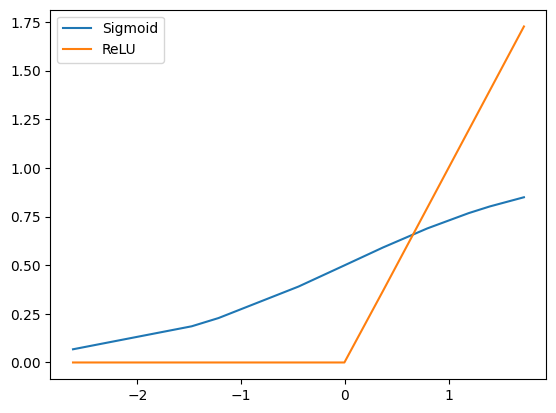

In [15]:
f, ax = plt.subplots(1, 1)
sns.lineplot(
    x=input.numpy(),
    y=output_sigmoid.numpy(),
    ax=ax,
    label='Sigmoid'
)

sns.lineplot(
    x=input.numpy(),
    y=output_relu.numpy(),
    ax=ax,
    label='ReLU'
)

A ReLU (rectified linear unit) activation function increases computational efficiency due to:
- sparse activation (allows for more zeros)
- simple to calculate (negative values are just zero)

### [`nn.Sequential`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential)

This chains the outputs of one module to be input sequentially for each subseqent module, returning the output of the last module.

In [16]:
X

tensor([[1.],
        [2.],
        [3.]])

In [17]:
X = torch.tensor([[0.,1.], [1., 2.]])
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=2),
)

In [18]:
model(X)

tensor([[0.5021, 0.3726],
        [0.6072, 0.4029]], grad_fn=<AddmmBackward0>)

In [19]:
X = torch.tensor([[0.,1.], [1., 2.], [2., 3.]])

In [20]:
X.size()

torch.Size([3, 2])

In [21]:
flatten = nn.Flatten() 
flatten(X).size()

torch.Size([3, 2])

### [`nn.Softmax`](https://docs.pytorch.org/docs/stable/generated/torch.nn.Softmax.html)

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)


logits

tensor([[-0.1169,  0.2847, -0.1767, -0.0016,  0.0646,  0.1692,  0.1714,  0.0752,
          0.0963, -0.3165],
        [-0.0396,  0.2076, -0.1960,  0.0099,  0.0885,  0.1415,  0.0333, -0.0710,
          0.0925, -0.2249],
        [ 0.0274,  0.1959, -0.2598, -0.0318,  0.2617,  0.0217,  0.1964, -0.1299,
          0.0939, -0.2490]], grad_fn=<AddmmBackward0>)

`logits` are the output of the last linear layer of the neural network, raw values in [-infty, infty]. After passing to softmax, they will be scaled to [0,1] representing the model's predicted probabilities for each class.

In [ ]:
softmax = nn.Softmax(dim=1) # the dimension for softmax computation, e.g. the sum will be 1
pred_probab = softmax(logits)
pred_probab

tensor([[0.0855, 0.1278, 0.0806, 0.0960, 0.1026, 0.1139, 0.1141, 0.1036, 0.1059,
         0.0701],
        [0.0949, 0.1215, 0.0811, 0.0997, 0.1079, 0.1137, 0.1021, 0.0920, 0.1083,
         0.0788],
        [0.1000, 0.1183, 0.0750, 0.0942, 0.1264, 0.0994, 0.1184, 0.0854, 0.1069,
         0.0758]], grad_fn=<SoftmaxBackward0>)

In [29]:
pred_probab.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

# Section 2

In [22]:
%watermark

Last updated: 2025-11-09T22:02:35.171912+00:00

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 9.7.0

Compiler    : GCC 12.2.0
OS          : Linux
Release     : 6.10.14-linuxkit
Machine     : aarch64
Processor   : 
CPU cores   : 7
Architecture: 64bit



In [23]:
%watermark -iv

matplotlib : 3.10.7
seaborn    : 0.13.2
torchvision: 0.24.0
torch      : 2.9.0

